# <center> CS F320 Foundations of Data Science <center>

## <center> Assignment <center>

***

### Group 8

#### 1. 2022A7PS0145P - Armaan Gupta
#### 2. 2022A7PS0065P - Animish Tiwari
#### 3. 2022A7PS0164P - Anjaneya Bajaj
#### 4. 2022A7PS0120P - Aryan Jain

***

#### Dataset : [Electrical Grid Stability Simulated Data](https://archive.ics.uci.edu/dataset/471/electrical+grid+stability+simulated+data)

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from ngboost import NGBRegressor
from tabulate import tabulate
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from ucimlrepo import fetch_ucirepo 

## Loading in the dataset and pre-processing

- We will first load in the dataset and take a look at the first few rows to understand the data better.
- We will then check for any missing values - there are none.
- As per the question, we will drop categorical columns - 'Country', 'Region', 'Year', 'Economy_status_Developed', 'Economy_status_Developing'.
- Eliminating outliers - any value that is more than 3 standard deviations away from the mean will be considered an outlier and will be removed.
- Making plots to visualize the data distributions.
- Splitting the data into training and testing sets.
- Applying PCA, taking 9 principal components to account for >95% variance.
- To also use the same data for the classification task, we modify the target life expectancy into 3 classes - 'Low' (0), 'Medium' (1), 'High' (2).

In [2]:
# df = pd.read_csv('./Life-Expectancy-Data-Updated.csv')
# df

In [ ]:
  # fetch dataset 
electrical_grid_stability_simulated_data = fetch_ucirepo(id=471) 
  
# data (as pandas dataframes) 
X = electrical_grid_stability_simulated_data.data.features 
y = electrical_grid_stability_simulated_data.data.targets 
  
# metadata 
print(electrical_grid_stability_simulated_data.metadata) 
  
# variable information 
print(electrical_grid_stability_simulated_data.variables) 


{'uci_id': 471, 'name': 'Electrical Grid Stability Simulated Data ', 'repository_url': 'https://archive.ics.uci.edu/dataset/471/electrical+grid+stability+simulated+data', 'data_url': 'https://archive.ics.uci.edu/static/public/471/data.csv', 'abstract': 'The local stability analysis of the 4-node star system (electricity producer is in the center) implementing Decentral Smart Grid Control concept. ', 'area': 'Physics and Chemistry', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 10000, 'num_features': 12, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['stab', 'stabf'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Tue Jan 09 2024', 'dataset_doi': '10.24432/C5PG66', 'creators': ['Vadim Arzamasov'], 'intro_paper': None, 'additional_info': {'summary': "The analysis is performed for different sets of input values using the methodology similar to

In [26]:
df = pd.concat([X, y], axis=1)

In [24]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [28]:
# Removing outliers in all columns

df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [29]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


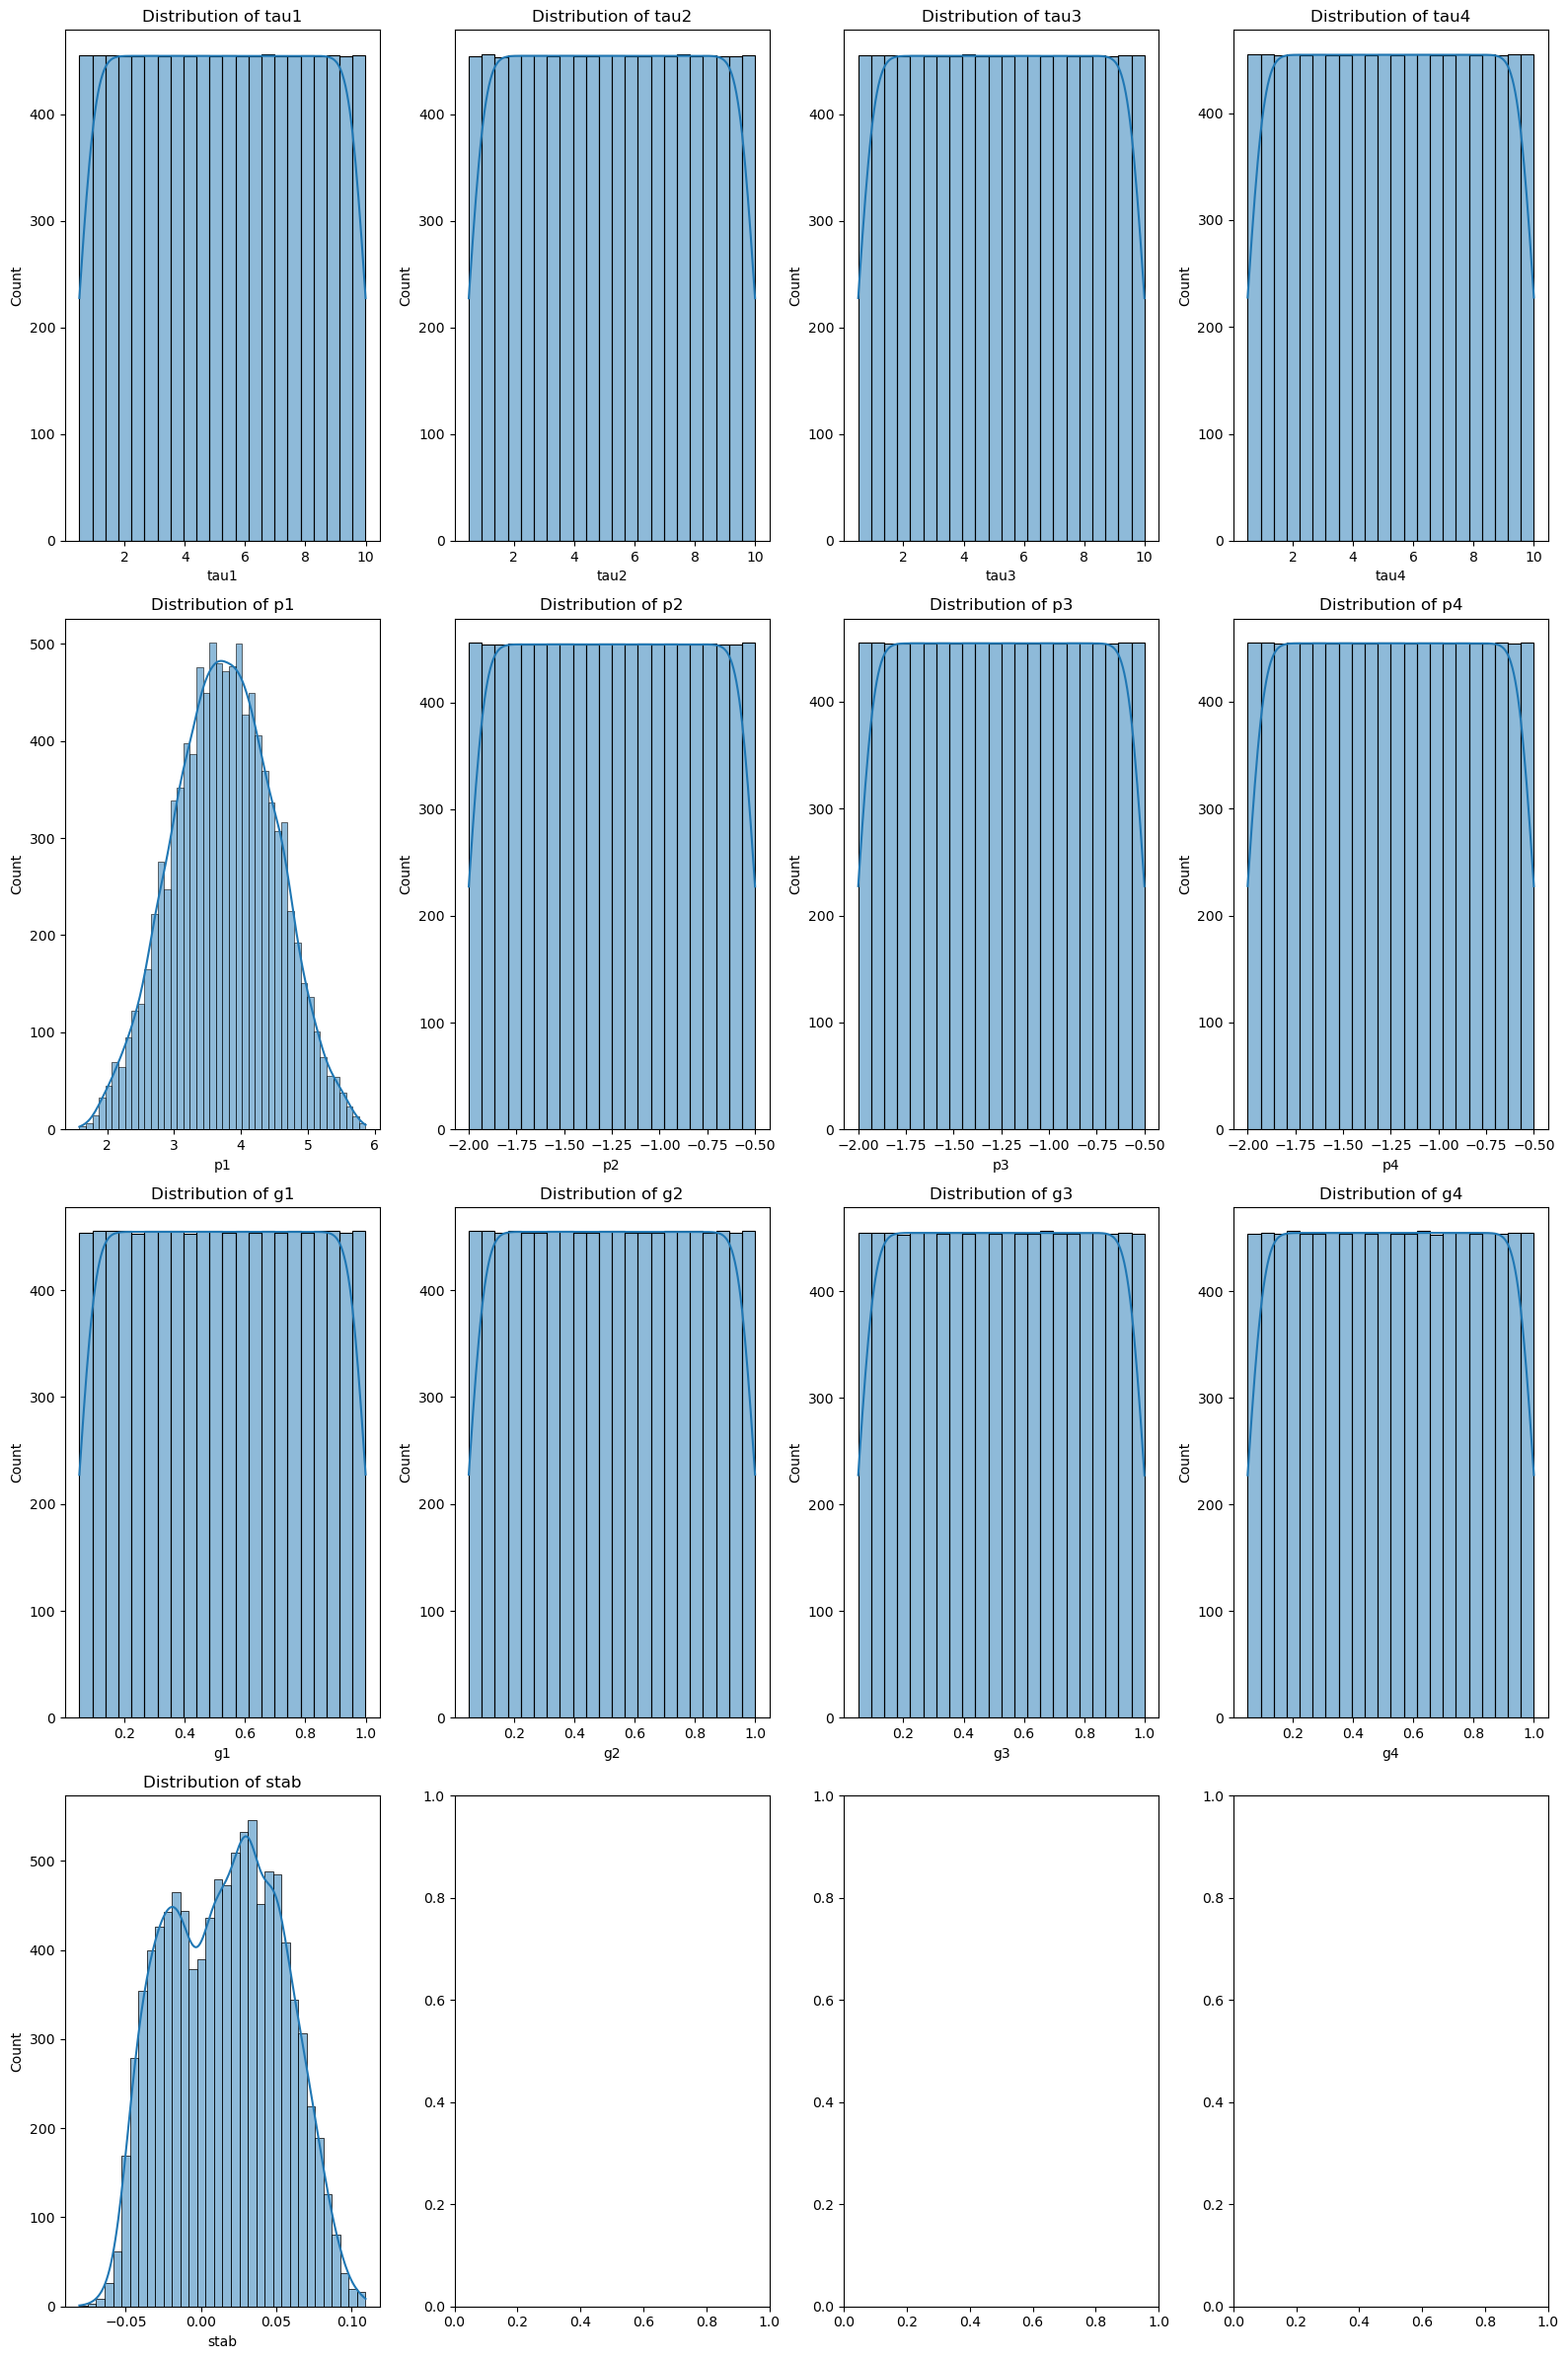

In [30]:
# Plotting the distribution of all numeric columns

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

num_plots = len(numeric_columns)
num_cols = 4  
num_rows = (num_plots // num_cols) + (1 if num_plots % num_cols != 0 else 0) 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 6*num_rows))
axes = axes.flatten()  

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [48]:
# Splitting the data into features and target

X = df.drop(['stab', 'stabf'], axis=1)
y = df['stab']
y_classification = df['stabf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train_classification, y_test_classification = train_test_split(X, y_classification, test_size=0.2, random_state=42)

In [37]:
# Scaling and applying PCA

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# pca = PCA(n_components=3)
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

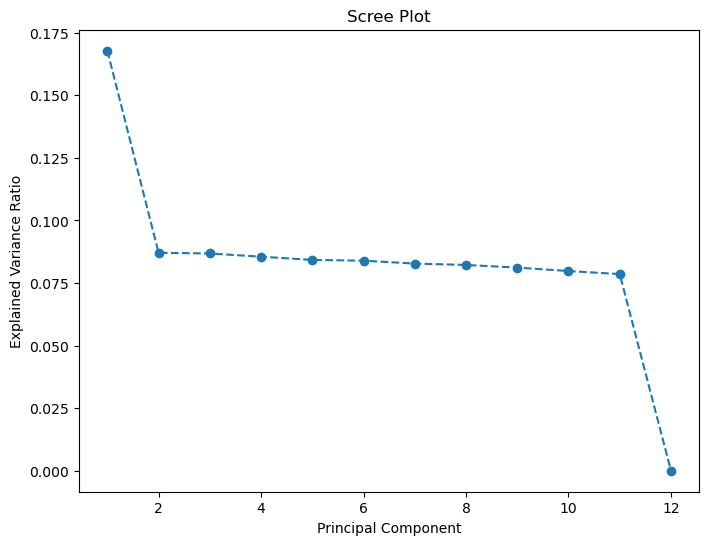

In [39]:
# Explained variance ratio

explained_variance = pca.explained_variance_ratio_

# Plotting scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

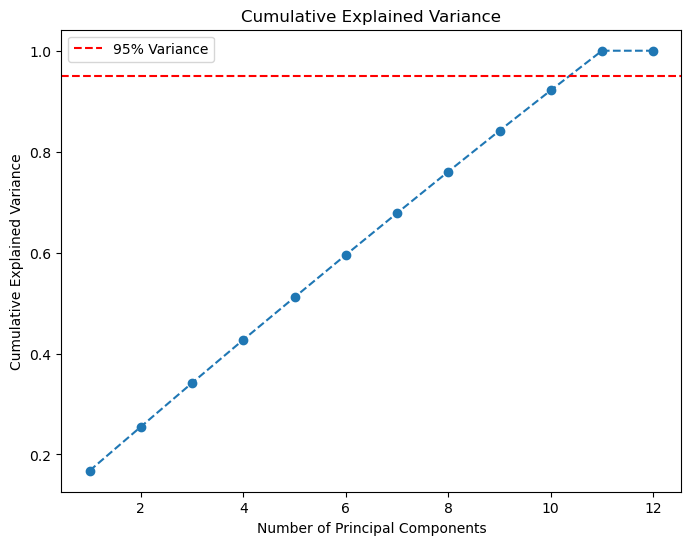

In [38]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.show()


In [40]:
# Based on plots, extracting 16 principal components

X_train_pca = X_train_pca[:, :3]
X_test_pca = X_test_pca[:, :3]

In [14]:
# Creating target variable for classification

bins = [40, 65, 75, 90]
labels = [0,1,2]

y_train_class = pd.cut(y_train, bins=bins, labels=labels)
y_test_class = pd.cut(y_test, bins=bins, labels=labels)

## Regression Models

Applying various regression models and calculating RMSE and MAE for each model. Models applied :
- Linear Regression
- Random Forests
- Extra Random Trees
- AdaBoost
- XGBoost
- NGBoost
- Neural Network

In [41]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective='reg:squarederror'),
    "NGBoost": NGBRegressor()
}

In [42]:
# Function to train and evaluate regression models

def regression_models(X_train, X_test, y_train, y_test, models):
    model_results = []
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        
        model_results.append({"Model": model_name, "RMSE": rmse, "MAE": mae})
    
    results_df = pd.DataFrame(model_results)
    return results_df

In [43]:
# Training on original dataset

results_original = regression_models(X_train, X_test, y_train, y_test, models)

[iter 0] loss=-1.8797 val_loss=0.0000 scale=1.0000 norm=0.4160
[iter 100] loss=-2.1502 val_loss=0.0000 scale=1.0000 norm=0.3342
[iter 200] loss=-2.3811 val_loss=0.0000 scale=1.0000 norm=0.3331
[iter 300] loss=-2.6092 val_loss=0.0000 scale=1.0000 norm=0.3455
[iter 400] loss=-2.8058 val_loss=0.0000 scale=1.0000 norm=0.3616


In [44]:
# Train on PCA dataset

results_pca = regression_models(X_train_pca, X_test_pca, y_train, y_test, models)

[iter 0] loss=-1.8797 val_loss=0.0000 scale=1.0000 norm=0.4160
[iter 100] loss=-2.0434 val_loss=0.0000 scale=2.0000 norm=0.7777
[iter 200] loss=-2.0928 val_loss=0.0000 scale=2.0000 norm=0.8545
[iter 300] loss=-2.1089 val_loss=0.0000 scale=1.0000 norm=0.4363
[iter 400] loss=-2.1187 val_loss=0.0000 scale=2.0000 norm=0.8763


In [45]:
print("Regression Models Evaluation on Original Dataset\n")
print(tabulate(results_original, headers=["Model", "RMSE", "MAE"], tablefmt="grid"))

Regression Models Evaluation on Original Dataset

+----+-------------------+------------+------------+
|    | Model             |       RMSE |        MAE |
+====+===================+============+============+
|  0 | Linear Regression | 0.0219688  | 0.017573   |
+----+-------------------+------------+------------+
|  1 | Random Forest     | 0.0120674  | 0.00927532 |
+----+-------------------+------------+------------+
|  2 | Extra Trees       | 0.0109415  | 0.00834579 |
+----+-------------------+------------+------------+
|  3 | AdaBoost          | 0.0182945  | 0.015345   |
+----+-------------------+------------+------------+
|  4 | XGBoost           | 0.00984797 | 0.00748619 |
+----+-------------------+------------+------------+
|  5 | NGBoost           | 0.0143274  | 0.0115002  |
+----+-------------------+------------+------------+


In [46]:
print("Regresssion Models Evaluation on PCA Dataset\n")
print(tabulate(results_pca, headers=["Model", "RMSE", "MAE"], tablefmt="grid"))

Regresssion Models Evaluation on PCA Dataset

+----+-------------------+-----------+-----------+
|    | Model             |      RMSE |       MAE |
+====+===================+===========+===========+
|  0 | Linear Regression | 0.0309493 | 0.0254353 |
+----+-------------------+-----------+-----------+
|  1 | Random Forest     | 0.0320998 | 0.0262398 |
+----+-------------------+-----------+-----------+
|  2 | Extra Trees       | 0.0329043 | 0.0268615 |
+----+-------------------+-----------+-----------+
|  3 | AdaBoost          | 0.0311398 | 0.0258854 |
+----+-------------------+-----------+-----------+
|  4 | XGBoost           | 0.032722  | 0.0266504 |
+----+-------------------+-----------+-----------+
|  5 | NGBoost           | 0.0307614 | 0.0252577 |
+----+-------------------+-----------+-----------+


## Classification Models

Applying various classification models and calculating accuracy, precision, recall and F1-score for each model. Models applied :
- Logistic Regression
- Naive Bayes
- KNN
- Linear SVM
- Kernel SVM
- Decision Trees
- 2 Layer Fully Connected Neural Network

In [49]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(kernel="linear", random_state=42),
    "Kernel SVM": SVC(kernel="rbf", random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

In [50]:
# Function to train and evaluate classification models

def classification_models(X_train, X_test, y_train, y_test, models):
    model_results = []
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average="weighted")
        recall = recall_score(y_test, y_pred, average="weighted")
        f1 = f1_score(y_test, y_pred, average="weighted")
    
        model_results.append([model_name, accuracy, precision, recall, f1])

    results_df = pd.DataFrame(model_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
    return results_df

In [51]:
results_original = classification_models(X_train, X_test, y_train_classification, y_test_classification, models)

In [53]:
results_pca = classification_models(X_train_pca, X_test_pca, y_train_classification, y_test_classification, models)

In [54]:
# Neural Network

class NN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
# Train function
def train(model, X_train, y_train, criterion, optimizer, num_epochs=100):
    model.train() 
    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        # Calculate predictions and accuracy
        _, predicted = torch.max(outputs, 1) 
        accuracy = (predicted == y_train).float().mean().item() * 100
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%")

# Test function
def test(model, X_test, y_test, results):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        y_pred = model(X_test).argmax(dim=1).numpy()

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    results.loc[len(results)] = ["Neural Network", accuracy, precision, recall, f1]
    print("Accuracy: {:.2f}%, Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(accuracy*100, precision, recall, f1))

In [56]:
# Train and test the model on original dataset

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_classification.to_numpy(), dtype=torch.long)
y_test_tensor = torch.tensor(y_test_classification.to_numpy(), dtype=torch.long)

input_size = X_train.shape[1]
hidden_size = 64
output_size = 3
model = NN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train(model, X_train_tensor, y_train_tensor, criterion, optimizer, num_epochs=1000)
test(model, X_test_tensor, y_test_tensor, results_original)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [27]:
# Train and test the model on PCA dataset

X_train_tensor = torch.tensor(X_train_pca, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_pca, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_class.to_numpy(), dtype=torch.long)
y_test_tensor = torch.tensor(y_test_class.to_numpy(), dtype=torch.long)

input_size = X_train_pca.shape[1]
hidden_size = 64
output_size = 3
model = NN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train(model, X_train_tensor, y_train_tensor, criterion, optimizer, num_epochs=100)
test(model, X_test_tensor, y_test_tensor, results_pca)

Epoch [10/100], Loss: 0.9552, Accuracy: 63.81%
Epoch [20/100], Loss: 0.8338, Accuracy: 76.92%
Epoch [30/100], Loss: 0.7364, Accuracy: 80.90%
Epoch [40/100], Loss: 0.6579, Accuracy: 81.60%
Epoch [50/100], Loss: 0.5947, Accuracy: 82.31%
Epoch [60/100], Loss: 0.5439, Accuracy: 83.11%
Epoch [70/100], Loss: 0.5034, Accuracy: 83.42%
Epoch [80/100], Loss: 0.4709, Accuracy: 83.77%
Epoch [90/100], Loss: 0.4446, Accuracy: 84.22%
Epoch [100/100], Loss: 0.4228, Accuracy: 84.43%
Accuracy: 85.89%, Precision: 0.87, Recall: 0.86, F1-Score: 0.85


In [57]:
print("Classification Models Evaluation on Original Dataset\n")
print(tabulate(results_original, headers=["Model", "Accuracy", "Precision", "Recall", "F1-Score"], tablefmt="grid"))

Classification Models Evaluation on Original Dataset

+----+---------------------+------------+-------------+----------+------------+
|    | Model               |   Accuracy |   Precision |   Recall |   F1-Score |
+====+=====================+============+=============+==========+============+
|  0 | Logistic Regression |     0.817  |    0.815786 |   0.817  |   0.816288 |
+----+---------------------+------------+-------------+----------+------------+
|  1 | Naive Bayes         |     0.837  |    0.834917 |   0.837  |   0.833976 |
+----+---------------------+------------+-------------+----------+------------+
|  2 | K-Nearest Neighbors |     0.789  |    0.787325 |   0.789  |   0.788022 |
+----+---------------------+------------+-------------+----------+------------+
|  3 | Linear SVM          |     0.8135 |    0.812208 |   0.8135 |   0.81274  |
+----+---------------------+------------+-------------+----------+------------+
|  4 | Kernel SVM          |     0.886  |    0.885207 |   0.886  |

In [58]:
print("Classification Models Evaluation on PCA Dataset\n")
print(tabulate(results_pca, headers=["Model", "Accuracy", "Precision", "Recall", "F1-Score"], tablefmt="grid"))

Classification Models Evaluation on PCA Dataset

+----+---------------------+------------+-------------+----------+------------+
|    | Model               |   Accuracy |   Precision |   Recall |   F1-Score |
+====+=====================+============+=============+==========+============+
|  0 | Logistic Regression |     0.727  |    0.717136 |   0.727  |   0.716578 |
+----+---------------------+------------+-------------+----------+------------+
|  1 | Naive Bayes         |     0.729  |    0.719573 |   0.729  |   0.719446 |
+----+---------------------+------------+-------------+----------+------------+
|  2 | K-Nearest Neighbors |     0.6815 |    0.672713 |   0.6815 |   0.675667 |
+----+---------------------+------------+-------------+----------+------------+
|  3 | Linear SVM          |     0.7315 |    0.721779 |   0.7315 |   0.718839 |
+----+---------------------+------------+-------------+----------+------------+
|  4 | Kernel SVM          |     0.73   |    0.72093  |   0.73   |   0.